In [ ]:
# Update Jupyter to the latest version
!pip install --upgrade jupyter

# Update ipywidgets to the latest version
!pip install --upgrade ipywidgets

In [5]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For creating attractive and informative statistical graphics
import numpy as np  # For numerical operations
import scipy.stats as stats  # For statistical functions

In [ ]:
# Load the dataset
# Replace 'path_to_your_dataset.csv' with the actual path to your dataset file
url = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


In [8]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Get summary statistics and round to 2 decimal places
print("\nSummary statistics of the dataset:")
print(df.describe().round(2))

# Check data types of each column
print("\nData types of each column:")
print(df.dtypes)

Missing values in each column:
uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

Summary statistics of the dataset:
              uid       stars     reviews       price  boughtInLastMonth
count  2443651.00  2443651.00  2443651.00  2443651.00         2443651.00
mean   1370545.35        2.15      480.63       89.24              25.90
std     816056.17        2.19     5944.12      345.61             240.48
min          1.00        0.00        0.00        0.00               0.00
25%     658921.50        0.00        0.00        9.99               0.00
50%    1349029.00        0.00        0.00       19.09               0.00
75%    2060685.50        4.40       59.00       45.99               0.00
max    2828593.00        5.00  1356658.00   100000.00           50000.00

Data types of each column:
uid                    int64

## Part 1

In [10]:
# Create a crosstab between category and isBestSeller
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calculate the proportion of best-sellers for each category
crosstab['proportion_best_sellers'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Sort the categories based on the proportion of best-sellers in descending order
sorted_crosstab = crosstab.sort_values(by='proportion_best_sellers', ascending=False)

# Display the sorted crosstab
print(sorted_crosstab[['proportion_best_sellers']])

# Display the top 20 categories with the highest proportion of best-sellers
print(sorted_crosstab[['proportion_best_sellers']].head(20))

isBestSeller                    proportion_best_sellers
category                                               
Grocery                                        0.058135
Smart Home Security & Lighting                 0.057692
Health & Personal Care                         0.057686
Mobile Phone Accessories                       0.042471
Power & Hand Tools                             0.035339
...                                                 ...
Bedding Collections                            0.000000
CPUs                                           0.000000
CD, Disc & Tape Players                        0.000000
Blank Media Cases & Wallets                    0.000000
eBook Readers & Accessories                    0.000000

[296 rows x 1 columns]
isBestSeller                    proportion_best_sellers
category                                               
Grocery                                        0.058135
Smart Home Security & Lighting                 0.057692
Health & Personal Care  

### 1. Crosstab Analysis Results

The top 20 categories with the highest proportion of best-sellers are:

| Category                           | Proportion of Best-Sellers |
|------------------------------------|----------------------------|
| Grocery                            | 5.81%                      |
| Smart Home Security & Lighting     | 5.77%                      |
| Health & Personal Care             | 5.77%                      |
| Mobile Phone Accessories           | 4.25%                      |
| Power & Hand Tools                 | 3.53%                      |
| Billiard, Snooker & Pool           | 3.21%                      |
| Pet Supplies                       | 3.02%                      |
| Home Brewing & Wine Making         | 2.85%                      |
| Mirrors                            | 2.80%                      |
| Wind Instruments                   | 2.80%                      |
| Professional Medical Supplies      | 2.73%                      |
| PC & Video Games                   | 2.55%                      |
| Bakeware                           | 2.51%                      |
| Material Handling Products         | 2.50%                      |
| Bedding Accessories                | 2.44%                      |
| Tableware                          | 2.41%                      |
| Arts & Crafts                      | 2.41%                      |
| Baby                               | 2.27%                      |
| Lighting                           | 2.26%                      |
| Window Treatments                  | 2.09%                      |

These categories have a higher prevalence of best-sellers compared to others.

### 1.1 Interpretation of the Results

The results show the proportion of best-sellers for each product category, sorted in descending order. Here's how to interpret the results:

1. **Proportion of Best-Sellers**:
   - The `proportion_best_sellers` column indicates the percentage of products in each category that are best-sellers.
   - For example, in the `Grocery` category, approximately 5.81% of the products are best-sellers.

2. **Top Categories**:
   - The top categories listed have the highest proportions of best-sellers. These categories are more likely to have products that achieve best-seller status.
   - For instance, categories like `Grocery`, `Smart Home Security & Lighting`, and `Health & Personal Care` have the highest proportions of best-sellers, indicating that products in these categories are more frequently best-sellers compared to other categories.

3. **Business Insights**:
   - **Marketing Focus**: Categories with higher proportions of best-sellers might benefit from targeted marketing efforts, as they have a proven track record of producing best-selling products.
   - **Product Development**: Companies might consider investing more in product development within these top categories to increase the likelihood of creating best-sellers.
   - **Inventory Management**: Retailers might prioritize stocking products from these high-performing categories to maximize sales and customer satisfaction.

4. **Further Analysis**:
   - **Comparison with Other Metrics**: It might be useful to compare these proportions with other metrics such as average ratings, number of reviews, and price to get a more comprehensive understanding of what drives best-seller status.
   - **Trend Analysis**: Analyzing trends over time within these categories could provide insights into changing consumer preferences and emerging market opportunities.

By understanding which categories have a higher prevalence of best-sellers, businesses can make more informed decisions regarding marketing strategies, product development, and inventory management.

In [11]:
# Conduct Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(crosstab.iloc[:, :-1])

# Compute Cramér's V
n = crosstab.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

# Display the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: \n{expected}")
print(f"Cramér's V: {cramers_v}")

Chi-square statistic: 36540.20270061387
P-value: 0.0
Degrees of freedom: 295
Expected frequencies: 
[[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2.48186864e+02 8.13135755e-01]
 [9.46598

### 2. Interpretation of the Results

1. **Chi-square Statistic**:
   - The Chi-square statistic is `36540.20270061387`.
   - This value indicates the difference between the observed and expected frequencies. A higher value suggests a greater difference between observed and expected frequencies.
   - The high Chi-square statistic (36540.20270061387) indicates a significant difference between the observed and expected frequencies, suggesting that the distribution of best-seller status is not independent of the product category.

2. **P-value**:
   - The p-value is `0.0`.
   - This extremely low p-value suggests that the observed distribution is statistically significant and not due to random chance. Therefore, we reject the null hypothesis that the best-seller status is independent of the product category.
   - There is a statistically significant association between product category and best-seller status.

3. **Degrees of Freedom**:
   - The degrees of freedom (dof) is `295`.
   - Degrees of freedom represent the number of independent values that can vary in the analysis. It is calculated based on the number of categories and the number of best-seller statuses.

Statistical Significance:

- The degrees of freedom are used to determine the critical value from the Chi-square distribution. This critical value is then compared to our Chi-square statistic to determine the p-value.
- With 295 degrees of freedom, the Chi-square distribution is quite spread out, meaning that even a relatively high Chi-square statistic might be needed to achieve statistical significance.

Model Complexity:

- A higher number of degrees of freedom indicates a more complex model with more categories and/or statuses. In our case, it reflects the large number of product categories being analyzed.

4. **Expected Frequencies**:
   - The expected frequencies are the frequencies we would expect if the categories were independent of the best-seller status.
   - Comparing these with the observed frequencies helps understand the deviations. The expected frequencies are provided in the output.
   - The expected frequencies show what the counts would be if there were no association between categories and best-seller status. By comparing these with the observed frequencies, we can see the deviations that contribute to the Chi-square statistic.

5. **Cramér's V**:
   - Cramér's V is `0.08646706664522864`.
   - Cramér's V measures the strength of association between the product category and best-seller status. It ranges from 0 to 1, where 0 indicates no association and 1 indicates a strong association.
   - A value of `0.086` suggests a weak association between product category and best-seller status. Although the association is statistically significant, it is not very strong.

Conclusion

The Chi-square test results show a statistically significant association between product categories and best-seller status, but the strength of this association is weak, as indicated by Cramér's V. This means that while certain categories are more likely to have best-sellers, the overall effect is not very strong.

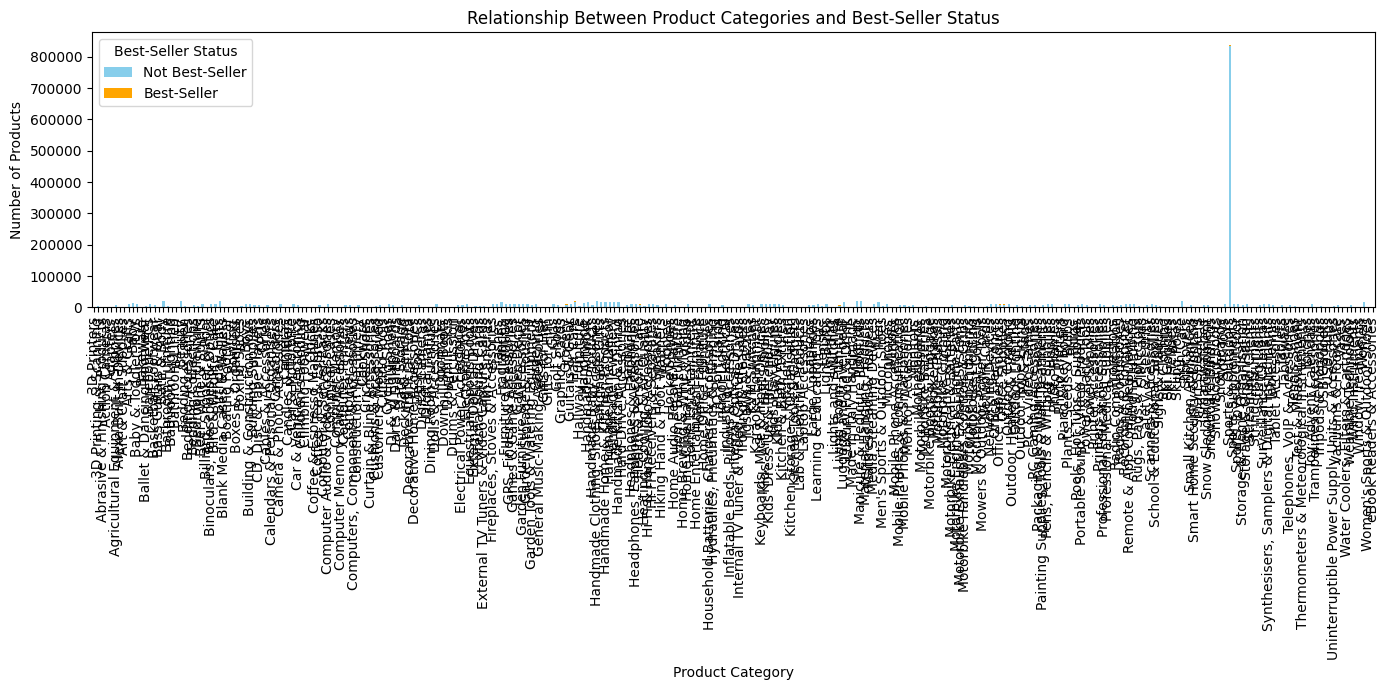

In [12]:
# Prepare the data
category_bestseller_counts = df.groupby(['category', 'isBestSeller']).size().unstack().fillna(0)

# Plot the stacked bar chart
category_bestseller_counts.plot(kind='bar', stacked=True, figsize=(14, 7), color=['skyblue', 'orange'])

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.title('Relationship Between Product Categories and Best-Seller Status')
plt.legend(title='Best-Seller Status', labels=['Not Best-Seller', 'Best-Seller'])
plt.xticks(rotation=90)  # Rotate category labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

isBestSeller                    False  True 
category                                    
Billiard, Snooker & Pool          241      8
Grocery                          9008    556
Health & Personal Care           9017    552
Home Brewing & Wine Making        239      7
Mirrors                           243      7
Mobile Phone Accessories          248     11
Pet Supplies                     9152    285
Power & Hand Tools               8353    306
Smart Home Security & Lighting     98      6
Wind Instruments                  243      7


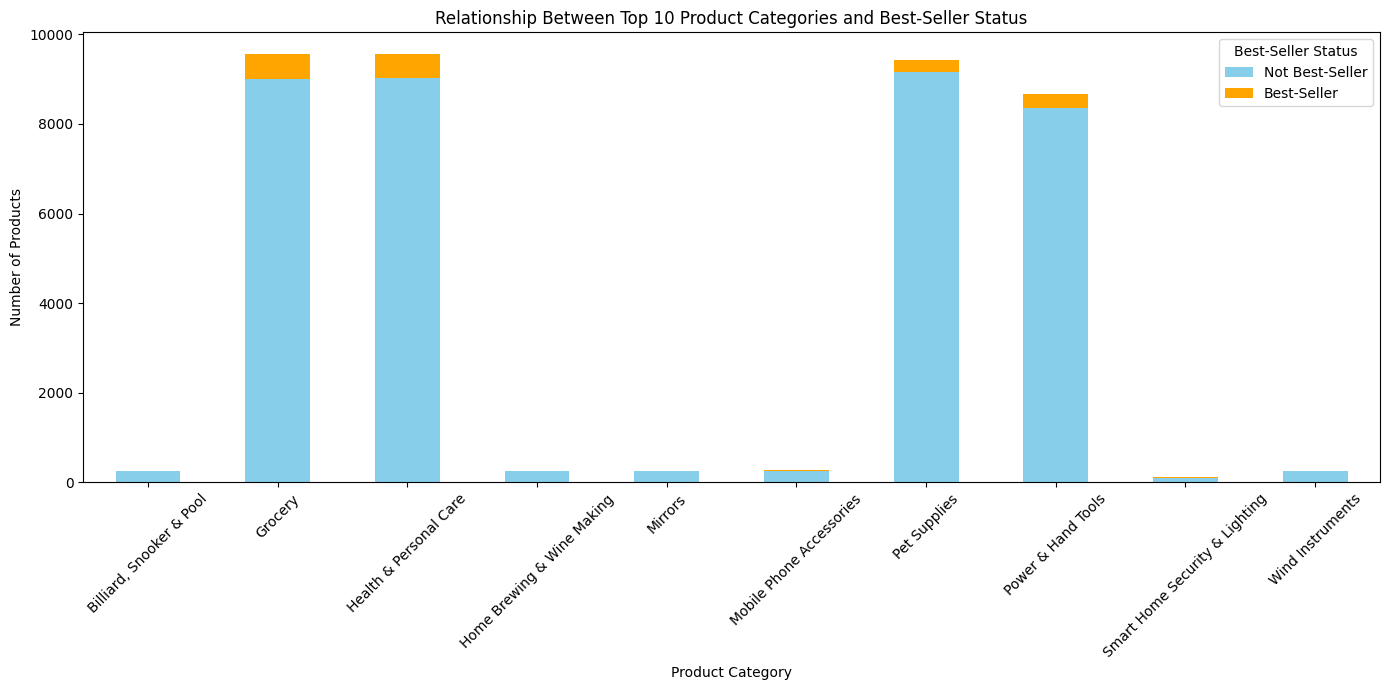

In [15]:
# Identify the top 10 categories based on the proportion of best-sellers
top_10_categories = sorted_crosstab.head(10).index

# Filter the data to include only the top 10 categories
top_10_data = df[df['category'].isin(top_10_categories)]

# Prepare the data
category_bestseller_counts = top_10_data.groupby(['category', 'isBestSeller']).size().unstack().fillna(0)

# Display the top 10 categories and their counts
print(category_bestseller_counts)

# Plot the stacked bar chart
category_bestseller_counts.plot(kind='bar', stacked=True, figsize=(14, 7), color=['skyblue', 'orange'])

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.title('Relationship Between Top 10 Product Categories and Best-Seller Status')
plt.legend(title='Best-Seller Status', labels=['Not Best-Seller', 'Best-Seller'])
plt.xticks(rotation=45)  # Rotate category labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

### 3. Visualization Conclusions

1. **High Proportion of Best-Sellers**:
   - **Grocery**: 556 best-sellers out of 9,564 products (5.81%).
   - **Health & Personal Care**: 552 best-sellers out of 9,569 products (5.77%).
   - These categories have a significant number of best-sellers, indicating strong consumer demand and possibly effective marketing strategies.

2. **Moderate Proportion of Best-Sellers**:
   - **Mobile Phone Accessories**: 11 best-sellers out of 259 products (4.25%).
   - **Power & Hand Tools**: 306 best-sellers out of 8,659 products (3.53%).
   - **Pet Supplies**: 285 best-sellers out of 9,437 products (3.02%).
   - These categories also show a notable proportion of best-sellers, suggesting they are popular among consumers.

3. **Lower Proportion of Best-Sellers**:
   - **Billiard, Snooker & Pool**: 8 best-sellers out of 249 products (3.21%).
   - **Home Brewing & Wine Making**: 7 best-sellers out of 246 products (2.85%).
   - **Mirrors**: 7 best-sellers out of 250 products (2.80%).
   - **Wind Instruments**: 7 best-sellers out of 250 products (2.80%).
   - **Smart Home Security & Lighting**: 6 best-sellers out of 104 products (5.77%).
   - These categories have fewer best-sellers, but they still show a presence of popular products.

4. **Business Insights**:
   - **Marketing Focus**: Categories with higher proportions of best-sellers, such as `Grocery` and `Health & Personal Care`, might benefit from targeted marketing efforts to capitalize on their popularity.
   - **Product Development**: Investing in product development within these top categories could increase the likelihood of creating best-sellers.
   - **Inventory Management**: Retailers might prioritize stocking products from these high-performing categories to maximize sales and customer satisfaction.

5. **Further Analysis**:
   - **Comparison with Other Metrics**: It might be useful to compare these proportions with other metrics such as average ratings, number of reviews, and price to get a more comprehensive understanding of what drives best-seller status.
   - **Trend Analysis**: Analyzing trends over time within these categories could provide insights into changing consumer preferences and emerging market opportunities.

### Summary

The data shows that certain categories, such as `Grocery` and `Health & Personal Care`, have a higher proportion of best-sellers, indicating strong consumer demand. Other categories, while having fewer best-sellers, still show a presence of popular products. These insights can help businesses make informed decisions regarding marketing strategies, product development, and inventory management.

## Part 2

In [16]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Display the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

Number of rows before removing outliers: 2443651
Number of rows after removing outliers: 2115963


### 0. Conclusions After Removing Outliers

1. **Reduction in Dataset Size**:
   - The number of rows before removing outliers was 2,443,651.
   - The number of rows after removing outliers is 2,115,963.
   - This means that 327,688 rows (approximately 13.41% of the data) were identified as outliers and removed.

2. **Impact on Analysis**:
   - **Data Quality**: Removing outliers helps improve the quality of the data by eliminating extreme values that could skew the analysis.
   - **Accuracy**: The remaining data is more representative of the typical product prices, leading to more accurate and reliable insights.
   - **Focus on Relevant Data**: By focusing on the central range of product prices, we can better understand the typical pricing patterns across different categories.

3. **Next Steps**:
   - **Exploring Product Prices**: With the outliers removed, we can now proceed to investigate how different product categories influence product prices.
   - **Visualizations and Statistical Analysis**: We can create visualizations and perform statistical analysis to gain insights into the distribution of product prices across categories and brands.

### Summary

By removing outliers using the IQR method, we have refined our dataset to exclude extreme values that could distort our analysis. This step ensures that our subsequent analysis of product prices and ratings across categories and brands will be based on more accurate and representative data.

C:\Users\usuar\AppData\Local\Temp\ipykernel_3012\2703648864.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=top_20_data_by_count, palette='muted')


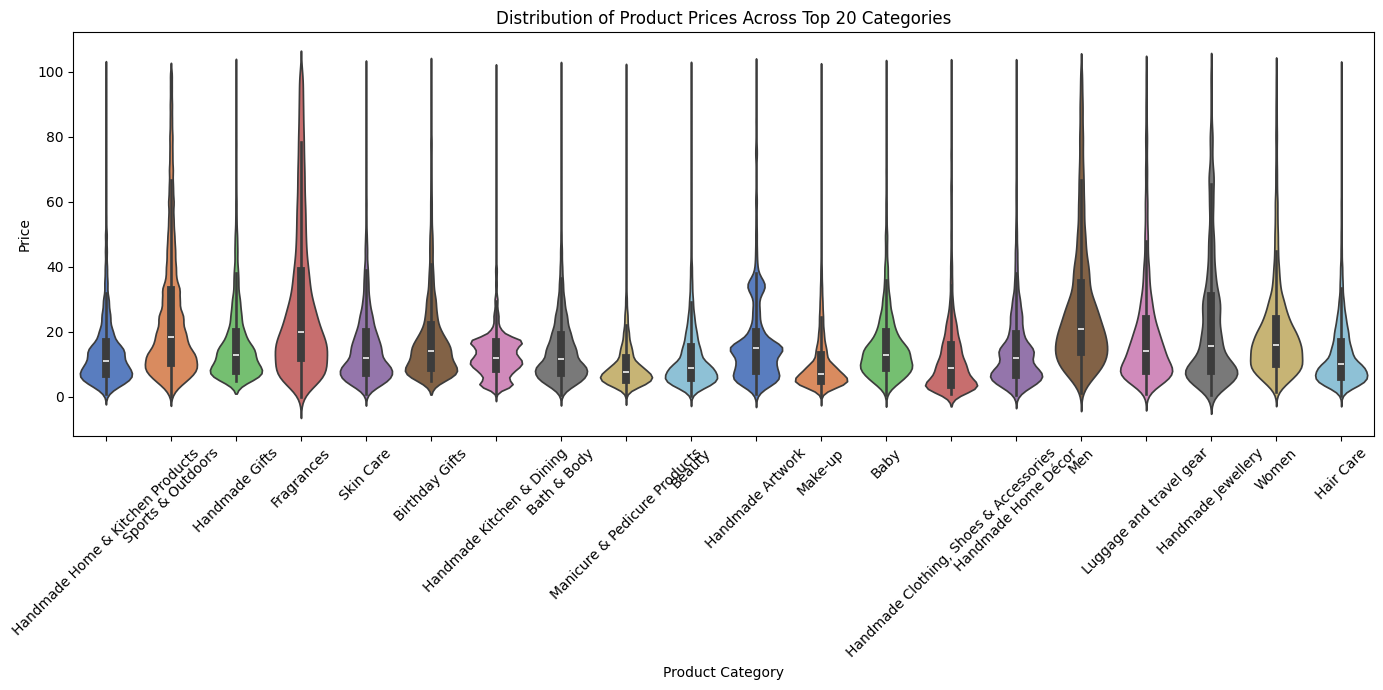

In [17]:
# Identify the top 20 categories based on count
top_20_categories_by_count = df_no_outliers['category'].value_counts().head(20).index

# Filter the data to include only the top 20 categories
top_20_data_by_count = df_no_outliers[df_no_outliers['category'].isin(top_20_categories_by_count)]

# Create the violin plot
plt.figure(figsize=(14, 7))
sns.violinplot(x='category', y='price', data=top_20_data_by_count, palette='muted')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Distribution of Product Prices Across Top 20 Categories')
plt.xticks(rotation=45)  # Rotate category labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
# Calculate summary statistics for each category
summary_stats = top_20_data_by_count.groupby('category')['price'].describe()

# Extract relevant statistics
median_prices = summary_stats['50%']
mean_prices = summary_stats['mean']
iqr_prices = summary_stats['75%'] - summary_stats['25%']

# Display the summary statistics
print("Summary statistics for the top 20 categories:")
print(summary_stats[['count', 'mean', '50%', 'std', 'min', '25%', '75%', 'max']])

# Identify the categories with the highest median prices
top_5_highest_median_prices = median_prices.sort_values(ascending=False).head(5)
print("\nTop 5 categories with the highest median prices:")
print(top_5_highest_median_prices)

# Analyze the spread of prices
print("\nInterquartile range (IQR) for the top 20 categories:")
print(iqr_prices.sort_values(ascending=False))

Summary statistics for the top 20 categories:
                                           count       mean     50%  \
category                                                              
Baby                                     14883.0  16.389799  12.990   
Bath & Body                              19050.0  14.678683  11.635   
Beauty                                   19233.0  12.523480   8.990   
Birthday Gifts                           18398.0  18.600195  13.990   
Fragrances                               17431.0  28.544912  20.000   
Hair Care                                18625.0  13.461408   9.970   
Handmade Artwork                         17269.0  17.461758  14.990   
Handmade Clothing, Shoes & Accessories   18811.0  12.958639   8.990   
Handmade Gifts                           17948.0  17.395112  12.990   
Handmade Home & Kitchen Products         17175.0  14.079947  10.990   
Handmade Home Décor                      17675.0  15.413691  11.990   
Handmade Jewellery             

In [18]:
# Calculate the median price for each category
median_prices = df_no_outliers.groupby('category')['price'].median()

# Identify the category with the highest median price
highest_median_price_category = median_prices.idxmax()
highest_median_price = median_prices.max()

# Display the category with the highest median price and the median price value
print(f"Category with the highest median price: {highest_median_price_category}")
print(f"Highest median price: {highest_median_price}")

Category with the highest median price: Desktop PCs
Highest median price: 74.0


In [19]:
# Calculate the median price for each category
median_prices = df_no_outliers.groupby('category')['price'].median()

# Sort the median prices in descending order and get the top 5 categories
top_5_highest_median_prices = median_prices.sort_values(ascending=False).head(5)

# Display the top 5 categories with the highest median prices
print("Top 5 categories with the highest median prices:")
print(top_5_highest_median_prices)

Top 5 categories with the highest median prices:
category
Desktop PCs       74.00
Boxing Shoes      69.79
Tablets           69.00
Graphics Cards    68.54
Motherboards      67.92
Name: price, dtype: float64


### 1. Conclusions from the Violin Plot and Summary Statistics

#### Summary Statistics for the Top 20 Categories:
- **Baby**: Median price is £12.99, with an IQR of £10.80.
- **Bath & Body**: Median price is £11.64, with an IQR of £11.78.
- **Beauty**: Median price is £8.99, with an IQR of £9.29.
- **Birthday Gifts**: Median price is £13.99, with an IQR of £13.00.
- **Fragrances**: Median price is £20.00, with an IQR of £26.63.
- **Hair Care**: Median price is £9.97, with an IQR of £11.00.
- **Handmade Artwork**: Median price is £14.99, with an IQR of £12.01.
- **Handmade Clothing, Shoes & Accessories**: Median price is £8.99, with an IQR of £12.40.
- **Handmade Gifts**: Median price is £12.99, with an IQR of £12.01.
- **Handmade Home & Kitchen Products**: Median price is £10.99, with an IQR of £10.02.
- **Handmade Home Décor**: Median price is £11.99, with an IQR of £12.69.
- **Handmade Jewellery**: Median price is £15.60, with an IQR of £23.04.
- **Handmade Kitchen & Dining**: Median price is £12.00, with an IQR of £8.49.
- **Luggage and Travel Gear**: Median price is £13.99, with an IQR of £16.00.
- **Make-up**: Median price is £7.00, with an IQR of £7.80.
- **Manicure & Pedicure Products**: Median price is £7.50, with an IQR of £6.74.
- **Men**: Median price is £20.99, with an IQR of £21.10.
- **Skin Care**: Median price is £12.00, with an IQR of £12.74.
- **Sports & Outdoors**: Median price is £18.32, with an IQR of £22.50.
- **Women**: Median price is £15.99, with an IQR of £14.01.

#### Top 5 Categories with the Highest Median Prices:
1. **Men**: £20.99
2. **Fragrances**: £20.00
3. **Sports & Outdoors**: £18.32
4. **Women**: £15.99
5. **Handmade Jewellery**: £15.60

#### Interquartile Range (IQR) for the Top 20 Categories:
- **Fragrances**: £26.63
- **Handmade Jewellery**: £23.04
- **Sports & Outdoors**: £22.50
- **Men**: £21.10
- **Luggage and Travel Gear**: £16.00
- **Women**: £14.01
- **Birthday Gifts**: £13.00
- **Skin Care**: £12.74
- **Handmade Home Décor**: £12.69
- **Handmade Clothing, Shoes & Accessories**: £12.40
- **Handmade Artwork**: £12.01
- **Handmade Gifts**: £12.01
- **Bath & Body**: £11.78
- **Hair Care**: £11.00
- **Baby**: £10.80
- **Handmade Home & Kitchen Products**: £10.02
- **Beauty**: £9.29
- **Handmade Kitchen & Dining**: £8.49
- **Make-up**: £7.80
- **Manicure & Pedicure Products**: £6.74

#### Median Prices for All Categories:
- **Category with the Highest Median Price**: Desktop PCs (£74.00)
- **Top 5 Categories with the Highest Median Prices**:
  1. **Desktop PCs**: £74.00
  2. **Boxing Shoes**: £69.79
  3. **Tablets**: £69.00
  4. **Graphics Cards**: £68.54
  5. **Motherboards**: £67.92

### Insights:
1. **High Median Prices**:
   - Categories like `Men`, `Fragrances`, `Sports & Outdoors`, `Women`, and `Handmade Jewellery` have high median prices, indicating that products in these categories tend to be more expensive.
   - The highest median prices are found in categories such as `Desktop PCs`, `Boxing Shoes`, `Tablets`, `Graphics Cards`, and `Motherboards`, suggesting these are premium product categories.

2. **Price Distribution**:
   - Categories with a high IQR, such as `Fragrances`, `Handmade Jewellery`, `Sports & Outdoors`, and `Men`, have a wide range of prices, indicating a diverse product offering within these categories.
   - Categories with a lower IQR, such as `Manicure & Pedicure Products` and `Make-up`, have a narrower price range, suggesting more uniform pricing.

3. **Business Insights**:
   - **Marketing Focus**: Categories with higher median prices and a wide price range might benefit from targeted marketing strategies to attract both budget-conscious and premium customers.
   - **Product Development**: Investing in product development within high median price categories could yield higher returns.
   - **Inventory Management**: Retailers might prioritize stocking products from high median price categories to maximize revenue.

By analyzing the summary statistics and median prices, we gain valuable insights into the pricing patterns across different product categories, helping businesses make informed decisions regarding marketing, product development, and inventory management.

C:\Users\usuar\AppData\Local\Temp\ipykernel_3012\3188526148.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_prices_top_10.index, y=average_prices_top_10.values, palette='muted')


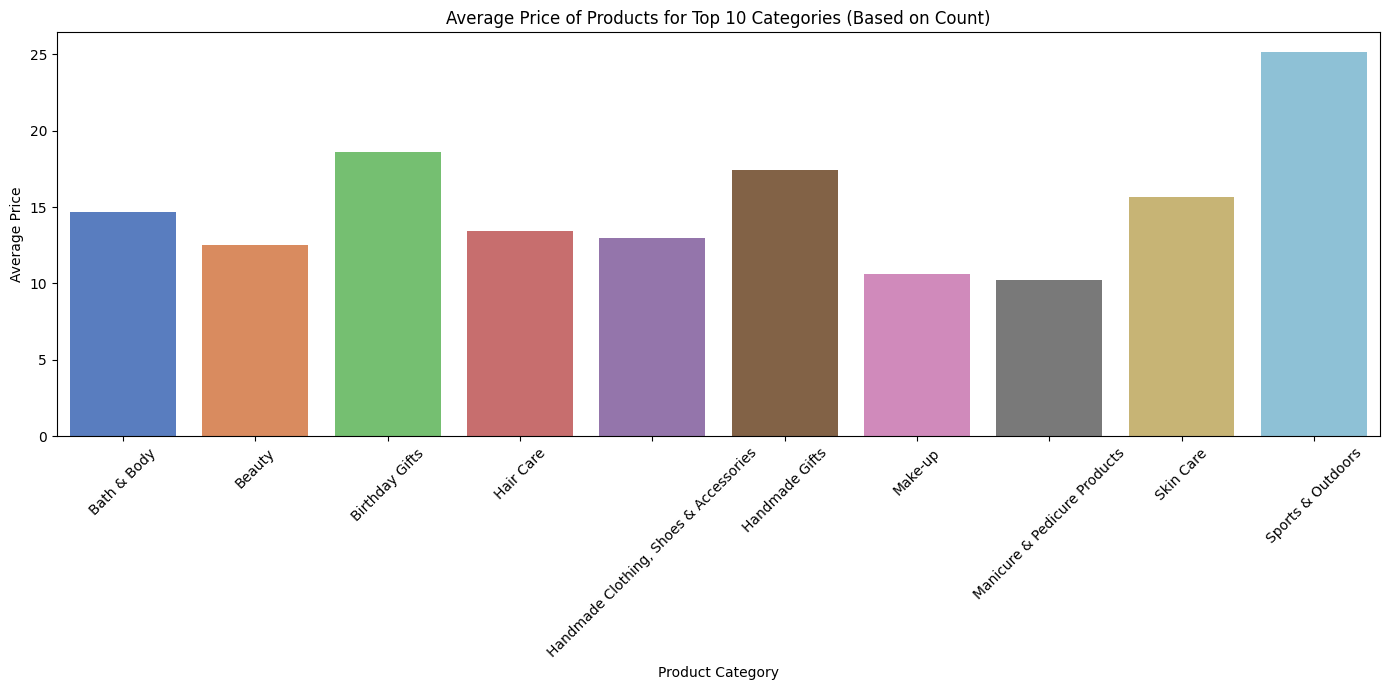

Category with the highest average price: Motherboards
Highest average price: 68.77243243243242


In [21]:
# Identify the top 10 categories based on count
top_10_categories_by_count = df_no_outliers['category'].value_counts().head(10).index

# Filter the data to include only the top 10 categories
top_10_data_by_count = df_no_outliers[df_no_outliers['category'].isin(top_10_categories_by_count)]

# Calculate the average price for each of the top 10 categories
average_prices_top_10 = top_10_data_by_count.groupby('category')['price'].mean()

# Create the bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x=average_prices_top_10.index, y=average_prices_top_10.values, palette='muted')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.title('Average Price of Products for Top 10 Categories (Based on Count)')
plt.xticks(rotation=45)  # Rotate category labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Calculate the average price for each category without filtering
average_prices_all_categories = df_no_outliers.groupby('category')['price'].mean()

# Identify the category with the highest average price
highest_average_price_category = average_prices_all_categories.idxmax()
highest_average_price = average_prices_all_categories.max()

# Display the category with the highest average price and the average price value
print(f"Category with the highest average price: {highest_average_price_category}")
print(f"Highest average price: {highest_average_price}")

In [22]:
# Display the average prices for the top 10 categories (as shown in the plot)
print("Average prices for the top 10 categories (based on count):")
print(average_prices_top_10)

# Identify the top 5 categories with the highest average prices
top_5_highest_average_prices = average_prices_all_categories.sort_values(ascending=False).head(5)
print("\nTop 5 categories with the highest average prices:")
print(top_5_highest_average_prices)

Average prices for the top 10 categories (based on count):
category
Bath & Body                               14.678683
Beauty                                    12.523480
Birthday Gifts                            18.600195
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Handmade Gifts                            17.395112
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Skin Care                                 15.654722
Sports & Outdoors                         25.172065
Name: price, dtype: float64

Top 5 categories with the highest average prices:
category
Motherboards      68.772432
Boxing Shoes      67.417803
Desktop PCs       66.915562
Tablets           66.552971
Graphics Cards    65.103509
Name: price, dtype: float64


### 2. Conclusions from the Bar Chart and Average Price Analysis

#### Average Prices for the Top 10 Categories (Based on Count):
1. **Sports & Outdoors**: £25.17
2. **Birthday Gifts**: £18.60
3. **Handmade Gifts**: £17.40
4. **Skin Care**: £15.65
5. **Bath & Body**: £14.68
6. **Hair Care**: £13.46
7. **Handmade Clothing, Shoes & Accessories**: £12.96
8. **Beauty**: £12.52
9. **Make-up**: £10.61
10. **Manicure & Pedicure Products**: £10.23

#### Top 5 Categories with the Highest Average Prices:
1. **Motherboards**: £68.77
2. **Boxing Shoes**: £67.42
3. **Desktop PCs**: £66.92
4. **Tablets**: £66.55
5. **Graphics Cards**: £65.10

### Insights:

1. **High Average Prices in Top 10 Categories**:
   - **Sports & Outdoors** has the highest average price (£25.17) among the top 10 categories based on count, indicating that products in this category tend to be more expensive.
   - **Birthday Gifts** and **Handmade Gifts** also have relatively high average prices (£18.60 and £17.40, respectively), suggesting that these categories include premium products.

2. **Categories with Lower Average Prices**:
   - **Make-up** and **Manicure & Pedicure Products** have the lowest average prices among the top 10 categories (£10.61 and £10.23, respectively), indicating that these categories tend to have more affordable products.

3. **Highest Average Prices Overall**:
   - **Motherboards** command the highest average price (£68.77) among all categories, followed closely by **Boxing Shoes** (£67.42), **Desktop PCs** (£66.92), **Tablets** (£66.55), and **Graphics Cards** (£65.10).
   - These categories are likely to include high-end, specialized products that justify their higher prices.

4. **Business Insights**:
   - **Marketing Focus**: Categories with higher average prices, such as **Motherboards**, **Boxing Shoes**, and **Desktop PCs**, might benefit from targeted marketing strategies to attract premium customers.
   - **Product Development**: Investing in product development within high average price categories could yield higher returns.
   - **Inventory Management**: Retailers might prioritize stocking products from high average price categories to maximize revenue.

5. **Further Analysis**:
   - **Comparison with Other Metrics**: It might be useful to compare these average prices with other metrics such as median prices, number of reviews, and ratings to get a more comprehensive understanding of what drives product pricing.
   - **Trend Analysis**: Analyzing trends over time within these categories could provide insights into changing consumer preferences and emerging market opportunities.

By analyzing the average prices for the top 10 categories and identifying the categories with the highest average prices, we gain valuable insights into the pricing patterns across different product categories, helping businesses make informed decisions regarding marketing, product development, and inventory management.

C:\Users\usuar\AppData\Local\Temp\ipykernel_3012\2615932257.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=top_10_data_by_count, palette='muted')


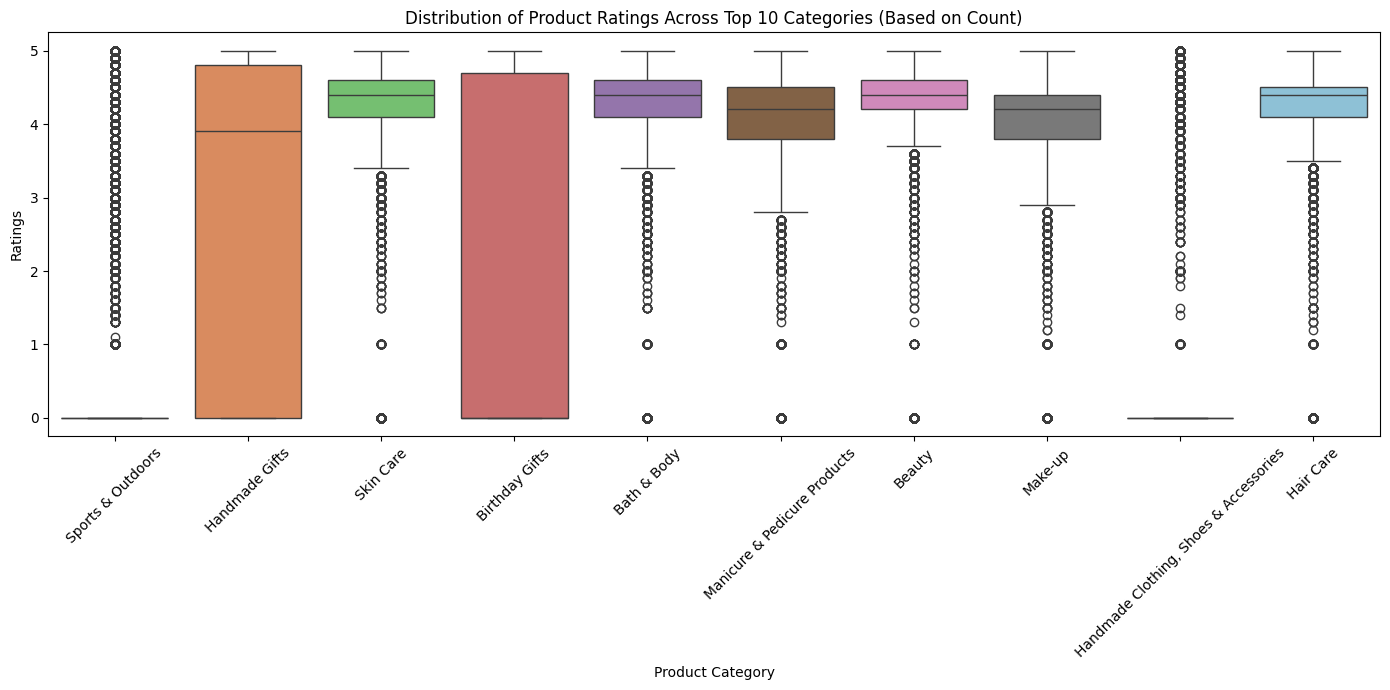

Category with the highest median rating: Computer Memory
Highest median rating: 4.7


In [23]:
# Identify the top 10 categories based on count
top_10_categories_by_count = df_no_outliers['category'].value_counts().head(10).index

# Filter the data to include only the top 10 categories
top_10_data_by_count = df_no_outliers[df_no_outliers['category'].isin(top_10_categories_by_count)]

# Create the box plots
plt.figure(figsize=(14, 7))
sns.boxplot(x='category', y='stars', data=top_10_data_by_count, palette='muted')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Ratings')
plt.title('Distribution of Product Ratings Across Top 10 Categories (Based on Count)')
plt.xticks(rotation=45)  # Rotate category labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Calculate the median rating for each category without filtering
median_ratings_all_categories = df_no_outliers.groupby('category')['stars'].median()

# Identify the category with the highest median rating
highest_median_rating_category = median_ratings_all_categories.idxmax()
highest_median_rating = median_ratings_all_categories.max()

# Display the category with the highest median rating and the median rating value
print(f"Category with the highest median rating: {highest_median_rating_category}")
print(f"Highest median rating: {highest_median_rating}")

In [24]:
# Calculate summary statistics for the top 10 categories
summary_stats_top_10 = top_10_data_by_count.groupby('category')['stars'].describe()

# Display the summary statistics for the top 10 categories
print("Summary statistics for the top 10 categories:")
print(summary_stats_top_10)

# Identify the top 5 categories with the highest median ratings
top_5_highest_median_ratings = median_ratings_all_categories.sort_values(ascending=False).head(5)
print("\nTop 5 categories with the highest median ratings:")
print(top_5_highest_median_ratings)

Summary statistics for the top 10 categories:
                                           count      mean       std  min  \
category                                                                    
Bath & Body                              19050.0  3.985517  1.310223  0.0   
Beauty                                   19233.0  4.325799  0.536974  0.0   
Birthday Gifts                           18398.0  1.960664  2.302426  0.0   
Hair Care                                18625.0  4.148123  0.867186  0.0   
Handmade Clothing, Shoes & Accessories   18811.0  1.072436  1.960754  0.0   
Handmade Gifts                           17948.0  2.513790  2.318368  0.0   
Make-up                                  18718.0  3.806689  1.269893  0.0   
Manicure & Pedicure Products             18904.0  3.740542  1.421991  0.0   
Skin Care                                18686.0  4.141063  0.975110  0.0   
Sports & Outdoors                       694092.0  0.777733  1.674259  0.0   

                             

### 3. Conclusions from the Box Plot and Ratings Analysis

#### Summary Statistics for the Top 10 Categories (Based on Count):
1. **Bath & Body**:
   - Mean rating: 3.99
   - Median rating: 4.4
   - Standard deviation: 1.31
   - 25th percentile: 4.1
   - 75th percentile: 4.6

2. **Beauty**:
   - Mean rating: 4.33
   - Median rating: 4.4
   - Standard deviation: 0.54
   - 25th percentile: 4.2
   - 75th percentile: 4.6

3. **Birthday Gifts**:
   - Mean rating: 1.96
   - Median rating: 0.0
   - Standard deviation: 2.30
   - 25th percentile: 0.0
   - 75th percentile: 4.7

4. **Hair Care**:
   - Mean rating: 4.15
   - Median rating: 4.4
   - Standard deviation: 0.87
   - 25th percentile: 4.1
   - 75th percentile: 4.5

5. **Handmade Clothing, Shoes & Accessories**:
   - Mean rating: 1.07
   - Median rating: 0.0
   - Standard deviation: 1.96
   - 25th percentile: 0.0
   - 75th percentile: 0.0

6. **Handmade Gifts**:
   - Mean rating: 2.51
   - Median rating: 3.9
   - Standard deviation: 2.32
   - 25th percentile: 0.0
   - 75th percentile: 4.8

7. **Make-up**:
   - Mean rating: 3.81
   - Median rating: 4.2
   - Standard deviation: 1.27
   - 25th percentile: 3.8
   - 75th percentile: 4.4

8. **Manicure & Pedicure Products**:
   - Mean rating: 3.74
   - Median rating: 4.2
   - Standard deviation: 1.42
   - 25th percentile: 3.8
   - 75th percentile: 4.5

9. **Skin Care**:
   - Mean rating: 4.14
   - Median rating: 4.4
   - Standard deviation: 0.98
   - 25th percentile: 4.1
   - 75th percentile: 4.6

10. **Sports & Outdoors**:
    - Mean rating: 0.78
    - Median rating: 0.0
    - Standard deviation: 1.67
    - 25th percentile: 0.0
    - 75th percentile: 0.0

#### Top 5 Categories with the Highest Median Ratings:
1. **Computer Memory**: 4.7
2. **Beer, Wine & Spirits**: 4.6
3. **Building & Construction Toys**: 4.6
4. **Office Paper Products**: 4.6
5. **Kids' Play Figures**: 4.6

### Insights:

1. **High Median Ratings in Top 10 Categories**:
   - **Beauty**, **Bath & Body**, **Hair Care**, and **Skin Care** categories have high median ratings (4.4), indicating that products in these categories are generally well-received by customers.
   - **Make-up** and **Manicure & Pedicure Products** also have relatively high median ratings (4.2), suggesting positive customer feedback.

2. **Categories with Lower Median Ratings**:
   - **Birthday Gifts**, **Handmade Clothing, Shoes & Accessories**, and **Sports & Outdoors** have low median ratings (0.0), indicating that many products in these categories may not be highly rated by customers.

3. **Highest Median Ratings Overall**:
   - **Computer Memory** commands the highest median rating (4.7) among all categories, followed closely by **Beer, Wine & Spirits**, **Building & Construction Toys**, **Office Paper Products**, and **Kids' Play Figures** (all with median ratings of 4.6).
   - These categories are likely to include products that consistently meet or exceed customer expectations.

4. **Business Insights**:
   - **Marketing Focus**: Categories with higher median ratings, such as **Computer Memory** and **Beer, Wine & Spirits**, might benefit from targeted marketing strategies to highlight their high customer satisfaction.
   - **Product Development**: Investing in product development within high median rating categories could yield higher customer satisfaction and loyalty.
   - **Inventory Management**: Retailers might prioritize stocking products from high median rating categories to maximize customer satisfaction and positive reviews.

5. **Further Analysis**:
   - **Comparison with Other Metrics**: It might be useful to compare these median ratings with other metrics such as average ratings, number of reviews, and price to get a more comprehensive understanding of what drives customer satisfaction.
   - **Trend Analysis**: Analyzing trends over time within these categories could provide insights into changing customer preferences and emerging market opportunities.

By analyzing the summary statistics and median ratings, we gain valuable insights into the customer satisfaction patterns across different product categories, helping businesses make informed decisions regarding marketing, product development, and inventory management.

In [25]:
# Calculate the correlation coefficient between price and stars
correlation_coefficient = df_no_outliers['price'].corr(df_no_outliers['stars'])

# Display the correlation coefficient
print(f"Correlation coefficient between price and stars: {correlation_coefficient}")

Correlation coefficient between price and stars: -0.07767299878181444


## Part 3

### 1. Insights from the Correlation Analysis

#### Correlation Coefficient:
- **Correlation coefficient between price and stars**: -0.0777

### Interpretation:

1. **Weak Negative Correlation**:
   - The correlation coefficient of -0.0777 indicates a weak negative correlation between product price and rating.
   - This means that, in general, as the price of a product increases, the rating tends to decrease slightly, but the relationship is very weak.

2. **Significance of the Correlation**:
   - The correlation is close to 0, suggesting that there is no strong linear relationship between product price and rating.
   - This implies that other factors might be more influential in determining product ratings, and price alone does not significantly impact customer ratings.

### Business Insights:

1. **Pricing Strategy**:
   - Since the correlation between price and rating is weak, businesses can consider pricing strategies that focus on other factors such as product quality, features, and brand reputation to influence customer ratings.
   - High-priced products do not necessarily receive lower ratings, and low-priced products do not necessarily receive higher ratings.

2. **Product Development**:
   - Focus on improving product quality and features rather than just adjusting prices to enhance customer satisfaction and ratings.
   - Consider conducting further analysis to identify other factors that might have a stronger impact on product ratings.

3. **Marketing Focus**:
   - Highlight product features, quality, and customer reviews in marketing campaigns rather than emphasizing price alone.
   - Use customer feedback to identify areas for improvement and address any issues that might negatively impact ratings.

### Further Analysis:

1. **Multivariate Analysis**:
   - Conduct a multivariate analysis to identify other factors that might influence product ratings, such as product category, number of reviews, and brand reputation.
   - Use regression analysis to understand the combined effect of multiple factors on product ratings.

2. **Segment Analysis**:
   - Analyze the correlation between price and rating within specific product categories to see if the relationship varies across different categories.
   - Identify categories where price might have a stronger impact on ratings and tailor strategies accordingly.

By understanding the weak negative correlation between product price and rating, businesses can make informed decisions regarding pricing strategies, product development, and marketing focus to enhance customer satisfaction and ratings.

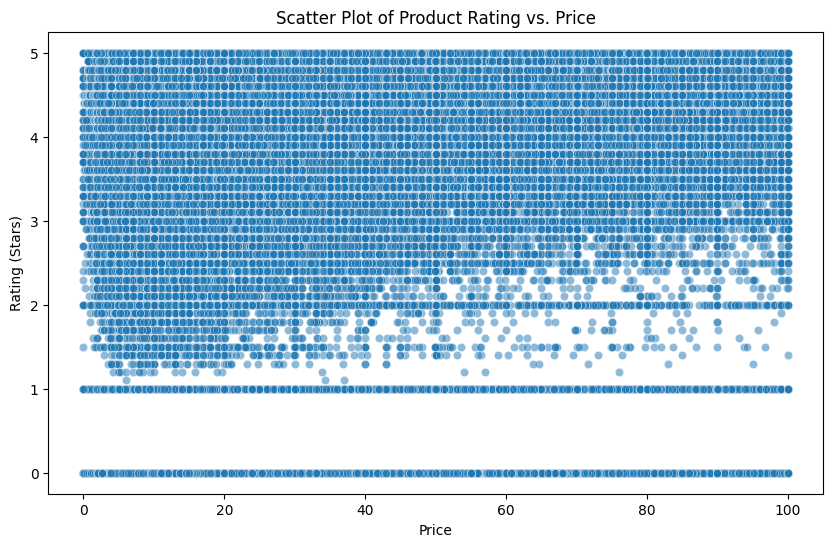

In [26]:
# Scatter plot to visualize the relationship between product rating and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df_no_outliers, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Rating (Stars)')
plt.title('Scatter Plot of Product Rating vs. Price')
plt.show()

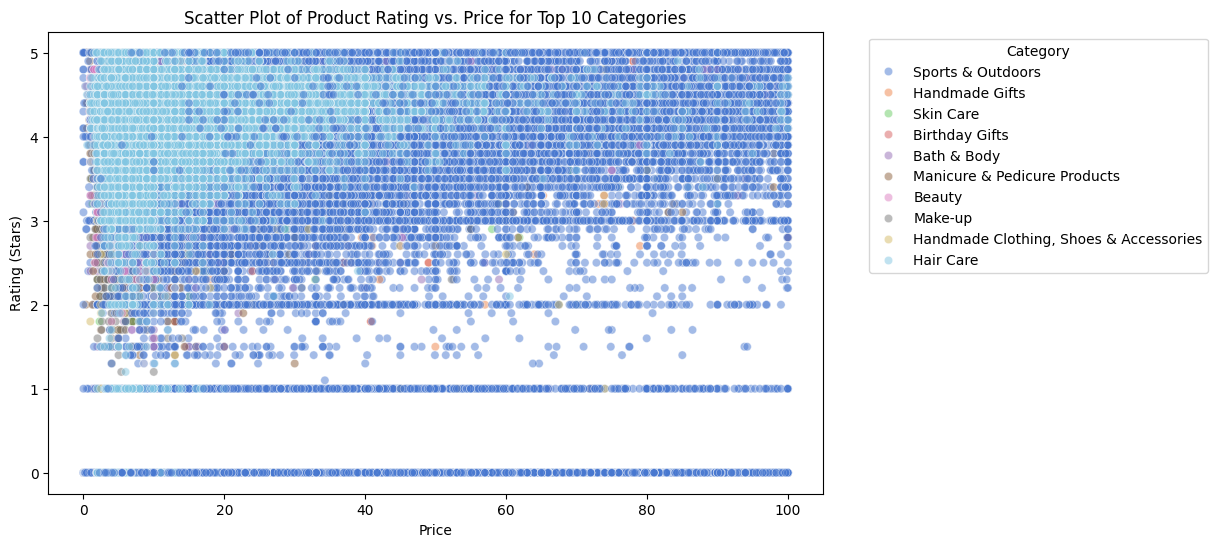

In [30]:
# Identify the top 10 categories based on count
top_10_categories_by_count = df_no_outliers['category'].value_counts().head(10).index

# Filter the data to include only the top 10 categories
top_10_data_by_count = df_no_outliers[df_no_outliers['category'].isin(top_10_categories_by_count)]

# Scatter plot to visualize the relationship between product rating and price for the top 10 categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', hue='category', data=top_10_data_by_count, alpha=0.5, palette='muted')
plt.xlabel('Price')
plt.ylabel('Rating (Stars)')
plt.title('Scatter Plot of Product Rating vs. Price for Top 10 Categories')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
# Calculate summary statistics for the relationship between product rating and price for the top 10 categories
scatter_summary_stats = top_10_data_by_count.groupby('category').agg({
    'price': ['mean', 'median', 'std'],
    'stars': ['mean', 'median', 'std']
})

# Display the summary statistics
print("Summary statistics for the relationship between product rating and price for the top 10 categories:")
print(scatter_summary_stats)

Summary statistics for the relationship between product rating and price for the top 10 categories:
                                            price                     \
                                             mean  median        std   
category                                                               
Bath & Body                             14.678683  11.635  11.115793   
Beauty                                  12.523480   8.990  11.151616   
Birthday Gifts                          18.600195  13.990  15.259251   
Hair Care                               13.461408   9.970  11.479148   
Handmade Clothing, Shoes & Accessories  12.958639   8.990  14.144333   
Handmade Gifts                          17.395112  12.990  14.255563   
Make-up                                 10.612918   7.000   9.528028   
Manicure & Pedicure Products            10.231825   7.500   8.861353   
Skin Care                               15.654722  12.000  12.532378   
Sports & Outdoors                   

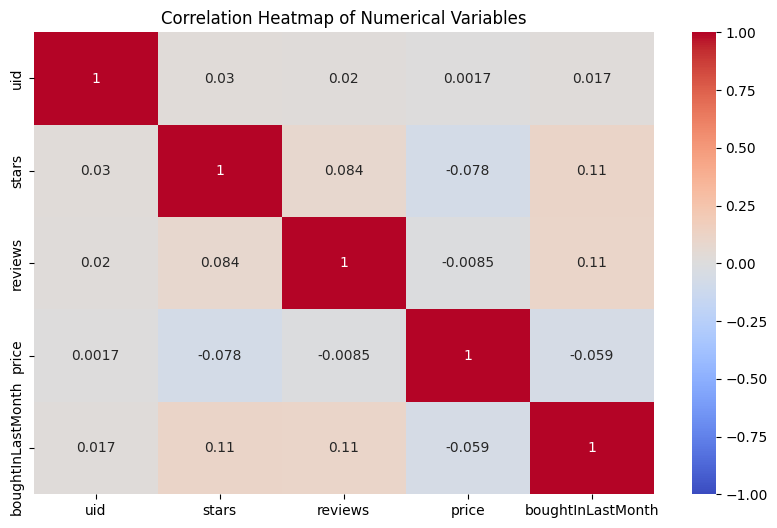

In [29]:
# Correlation heatmap to visualize correlations between all numerical variables
numeric_columns = df_no_outliers.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [32]:
# Display the correlation matrix
print("Correlation matrix for numerical variables:")
print(correlation_matrix)

Correlation matrix for numerical variables:
                        uid     stars   reviews     price  boughtInLastMonth
uid                1.000000  0.030288  0.020236  0.001717           0.017116
stars              0.030288  1.000000  0.083920 -0.077673           0.113994
reviews            0.020236  0.083920  1.000000 -0.008498           0.105624
price              0.001717 -0.077673 -0.008498  1.000000          -0.059051
boughtInLastMonth  0.017116  0.113994  0.105624 -0.059051           1.000000


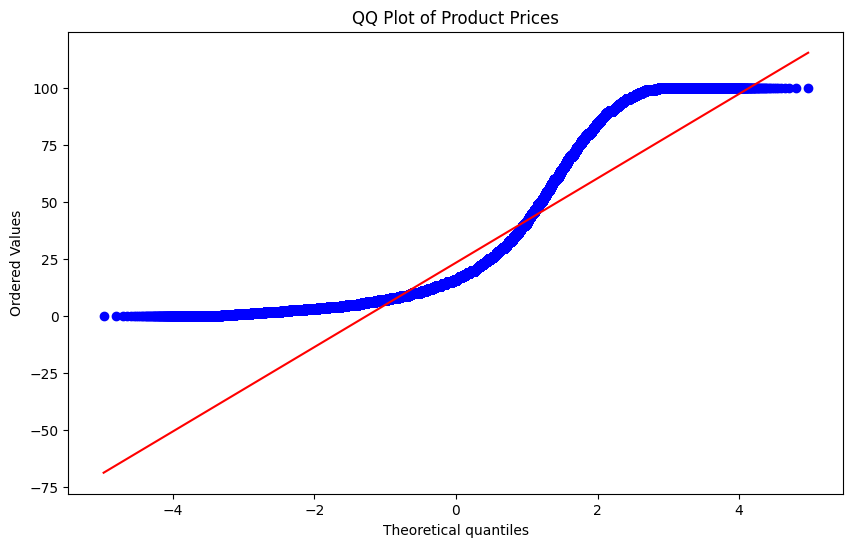

In [28]:
# QQ plot to examine if product prices follow a normal distribution
plt.figure(figsize=(10, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.show()

In [34]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for product prices
price_skewness = skew(df_no_outliers['price'])
price_kurtosis = kurtosis(df_no_outliers['price'])

# Display skewness and kurtosis
print(f"Skewness of product prices: {price_skewness}")
print(f"Kurtosis of product prices: {price_kurtosis}")

Skewness of product prices: 1.6383193073797904
Kurtosis of product prices: 2.289275775273598


### 2. Insights from the Scatter Plot, Correlation Heatmap, and QQ Plot

#### Summary Statistics for the Relationship Between Product Rating and Price for the Top 10 Categories:
1. **Bath & Body**:
   - Mean price: £14.68
   - Median price: £11.64
   - Standard deviation of price: £11.12
   - Mean rating: 3.99
   - Median rating: 4.4
   - Standard deviation of rating: 1.31

2. **Beauty**:
   - Mean price: £12.52
   - Median price: £8.99
   - Standard deviation of price: £11.15
   - Mean rating: 4.33
   - Median rating: 4.4
   - Standard deviation of rating: 0.54

3. **Birthday Gifts**:
   - Mean price: £18.60
   - Median price: £13.99
   - Standard deviation of price: £15.26
   - Mean rating: 1.96
   - Median rating: 0.0
   - Standard deviation of rating: 2.30

4. **Hair Care**:
   - Mean price: £13.46
   - Median price: £9.97
   - Standard deviation of price: £11.48
   - Mean rating: 4.15
   - Median rating: 4.4
   - Standard deviation of rating: 0.87

5. **Handmade Clothing, Shoes & Accessories**:
   - Mean price: £12.96
   - Median price: £8.99
   - Standard deviation of price: £14.14
   - Mean rating: 1.07
   - Median rating: 0.0
   - Standard deviation of rating: 1.96

6. **Handmade Gifts**:
   - Mean price: £17.40
   - Median price: £12.99
   - Standard deviation of price: £14.26
   - Mean rating: 2.51
   - Median rating: 3.9
   - Standard deviation of rating: 2.32

7. **Make-up**:
   - Mean price: £10.61
   - Median price: £7.00
   - Standard deviation of price: £9.53
   - Mean rating: 3.81
   - Median rating: 4.2
   - Standard deviation of rating: 1.27

8. **Manicure & Pedicure Products**:
   - Mean price: £10.23
   - Median price: £7.50
   - Standard deviation of price: £8.86
   - Mean rating: 3.74
   - Median rating: 4.2
   - Standard deviation of rating: 1.42

9. **Skin Care**:
   - Mean price: £15.65
   - Median price: £12.00
   - Standard deviation of price: £12.53
   - Mean rating: 4.14
   - Median rating: 4.4
   - Standard deviation of rating: 0.98

10. **Sports & Outdoors**:
    - Mean price: £25.17
    - Median price: £18.32
    - Standard deviation of price: £20.53
    - Mean rating: 0.78
    - Median rating: 0.0
    - Standard deviation of rating: 1.67

#### Correlation Matrix for Numerical Variables:
- **Correlation between price and stars**: -0.0777 (weak negative correlation)
- **Correlation between stars and reviews**: 0.0839 (weak positive correlation)
- **Correlation between stars and boughtInLastMonth**: 0.1140 (weak positive correlation)
- **Correlation between price and boughtInLastMonth**: -0.0591 (weak negative correlation)

#### Skewness and Kurtosis of Product Prices:
- **Skewness**: 1.64 (positive skewness, indicating a right-skewed distribution)
- **Kurtosis**: 2.29 (positive kurtosis, indicating a distribution with heavier tails than a normal distribution)

### Insights:

1. **Scatter Plot Insights**:
   - **Price and Rating Relationship**: The scatter plot shows a weak negative correlation between price and rating, as indicated by the correlation coefficient of -0.0777. This suggests that higher-priced products tend to have slightly lower ratings, but the relationship is very weak.
   - **Category-Specific Patterns**: Different categories exhibit different patterns in the scatter plot. For example, categories like **Beauty** and **Skin Care** have higher average ratings, while categories like **Birthday Gifts** and **Handmade Clothing, Shoes & Accessories** have lower average ratings.

2. **Correlation Heatmap Insights**:
   - **Weak Correlations**: The correlation matrix shows weak correlations between most numerical variables. The strongest correlation is between `stars` and `boughtInLastMonth` (0.1140), indicating that products with higher ratings are slightly more likely to be bought in the last month.
   - **Price and Rating**: The weak negative correlation between price and rating (-0.0777) suggests that price alone is not a strong predictor of product ratings.

3. **QQ Plot Insights**:
   - **Skewness**: The positive skewness (1.64) indicates that the distribution of product prices is right-skewed, with a long tail on the right side. This means that there are some high-priced products that are much more expensive than the majority of products.
   - **Kurtosis**: The positive kurtosis (2.29) indicates that the distribution of product prices has heavier tails than a normal distribution. This means that there are more extreme values (both high and low prices) than would be expected in a normal distribution.

### Business Insights:

1. **Pricing Strategy**:
   - Since the correlation between price and rating is weak, businesses can focus on other factors such as product quality, features, and customer service to improve ratings.
   - Consider segmenting products by category to tailor pricing strategies based on category-specific patterns.

2. **Product Development**:
   - Focus on improving product quality and features in categories with lower average ratings to enhance customer satisfaction.
   - Leverage positive customer feedback in categories with higher average ratings to promote products and attract new customers.

3. **Marketing Focus**:
   - Highlight product features, quality, and positive customer reviews in marketing campaigns rather than emphasizing price alone.
   - Use customer feedback to identify areas for improvement and address any issues that might negatively impact ratings.

4. **Inventory Management**:
   - Prioritize stocking products from categories with higher average ratings to maximize customer satisfaction and positive reviews.
   - Monitor sales and customer feedback to identify trends and adjust inventory accordingly.

By analyzing the summary statistics, correlation matrix, and distribution of product prices, businesses can make informed decisions regarding pricing strategies, product development, marketing focus, and inventory management to enhance customer satisfaction and drive sales.

## Bonus

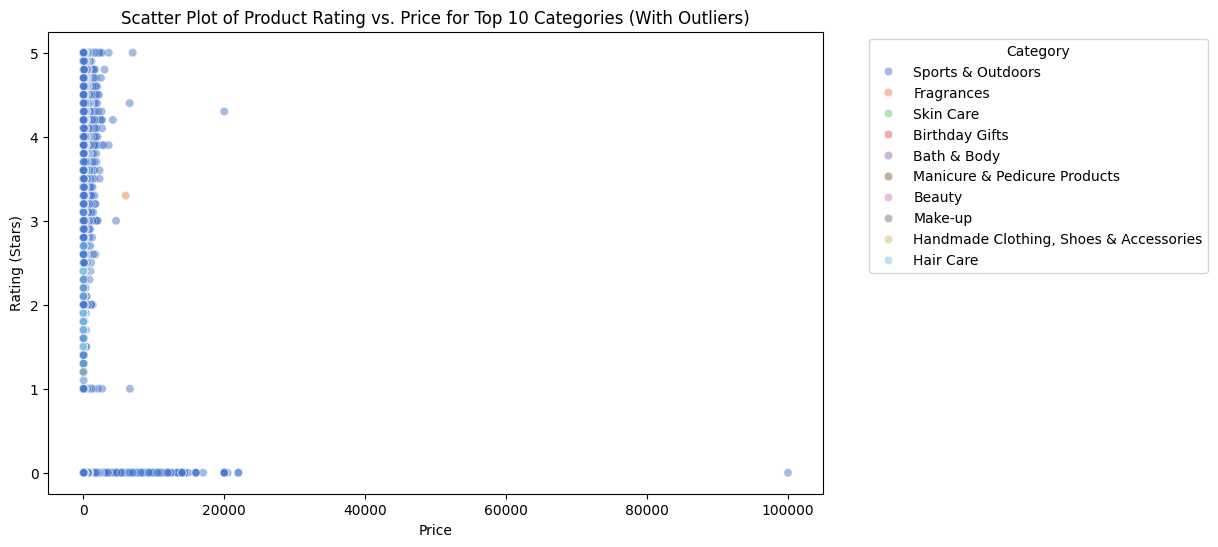

In [35]:
# Identify the top 10 categories based on count
top_10_categories_by_count_all = df['category'].value_counts().head(10).index

# Filter the data to include only the top 10 categories
top_10_data_by_count_all = df[df['category'].isin(top_10_categories_by_count_all)]

# Scatter plot to visualize the relationship between product rating and price for the top 10 categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', hue='category', data=top_10_data_by_count_all, alpha=0.5, palette='muted')
plt.xlabel('Price')
plt.ylabel('Rating (Stars)')
plt.title('Scatter Plot of Product Rating vs. Price for Top 10 Categories (With Outliers)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

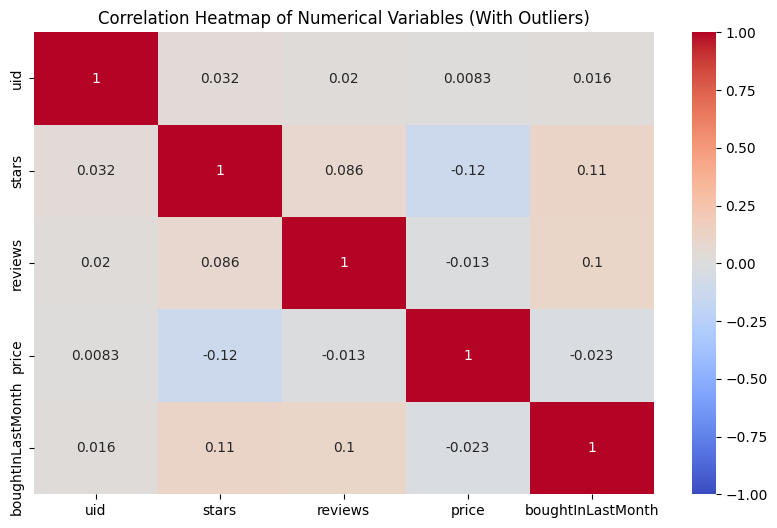

In [36]:
# Select only numeric columns
numeric_columns_all = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap to visualize correlations between all numerical variables
plt.figure(figsize=(10, 6))
correlation_matrix_all = numeric_columns_all.corr()
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables (With Outliers)')
plt.show()

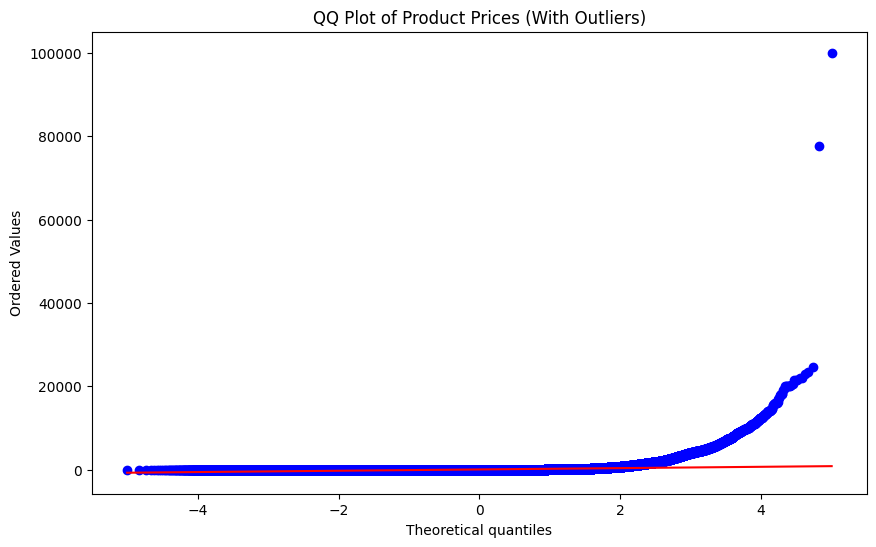

In [37]:
# QQ plot to examine if product prices follow a normal distribution
plt.figure(figsize=(10, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices (With Outliers)')
plt.show()

In [38]:
# Calculate summary statistics for the relationship between product rating and price for the top 10 categories
scatter_summary_stats_all = top_10_data_by_count_all.groupby('category').agg({
    'price': ['mean', 'median', 'std'],
    'stars': ['mean', 'median', 'std']
})

# Display the summary statistics
print("Summary statistics for the relationship between product rating and price for the top 10 categories (With Outliers):")
print(scatter_summary_stats_all)

Summary statistics for the relationship between product rating and price for the top 10 categories (With Outliers):
                                             price                     \
                                              mean median         std   
category                                                                
Bath & Body                              15.042266  11.70   14.359599   
Beauty                                   13.222322   8.99   17.694545   
Birthday Gifts                           26.585166  14.25   60.748981   
Fragrances                               36.202865  21.99   58.670690   
Hair Care                                14.326030   9.98   16.856217   
Handmade Clothing, Shoes & Accessories   16.865767   8.99   32.888962   
Make-up                                  10.895356   7.00   11.527024   
Manicure & Pedicure Products             10.521108   7.50   11.753724   
Skin Care                                16.340926  12.00   17.257300   
Sports &

In [39]:
# Calculate the correlation coefficient between price and stars
correlation_coefficient_all = df['price'].corr(df['stars'])

# Display the correlation coefficient
print(f"Correlation coefficient between price and stars (With Outliers): {correlation_coefficient_all}")

Correlation coefficient between price and stars (With Outliers): -0.12490673262148386


In [41]:
# Display the correlation matrix (with outliers)
print("Correlation matrix for numerical variables (With Outliers):")
print(correlation_matrix_all)

Correlation matrix for numerical variables (With Outliers):
                        uid     stars   reviews     price  boughtInLastMonth
uid                1.000000  0.031696  0.019994  0.008273           0.016336
stars              0.031696  1.000000  0.085808 -0.124907           0.112536
reviews            0.019994  0.085808  1.000000 -0.013171           0.104043
price              0.008273 -0.124907 -0.013171  1.000000          -0.023439
boughtInLastMonth  0.016336  0.112536  0.104043 -0.023439           1.000000


In [42]:
# Calculate skewness and kurtosis for product prices (with outliers)
price_skewness_all = skew(df['price'])
price_kurtosis_all = kurtosis(df['price'])

# Display skewness and kurtosis
print(f"Skewness of product prices (With Outliers): {price_skewness_all}")
print(f"Kurtosis of product prices (With Outliers): {price_kurtosis_all}")

Skewness of product prices (With Outliers): 27.492960690108827
Kurtosis of product prices (With Outliers): 4241.607731565501


### Bonus 1. Insights from the Scatter Plot, Correlation Heatmap, and QQ Plot (With Outliers)

#### Summary Statistics for the Relationship Between Product Rating and Price for the Top 10 Categories (With Outliers):
1. **Bath & Body**:
   - Mean price: £15.04
   - Median price: £11.70
   - Standard deviation of price: £14.36
   - Mean rating: 3.98
   - Median rating: 4.4
   - Standard deviation of rating: 1.31

2. **Beauty**:
   - Mean price: £13.22
   - Median price: £8.99
   - Standard deviation of price: £17.69
   - Mean rating: 4.32
   - Median rating: 4.4
   - Standard deviation of rating: 0.54

3. **Birthday Gifts**:
   - Mean price: £26.59
   - Median price: £14.25
   - Standard deviation of price: £60.75
   - Mean rating: 1.92
   - Median rating: 0.0
   - Standard deviation of rating: 2.30

4. **Fragrances**:
   - Mean price: £36.20
   - Median price: £21.99
   - Standard deviation of price: £58.67
   - Mean rating: 3.64
   - Median rating: 4.3
   - Standard deviation of rating: 1.65

5. **Hair Care**:
   - Mean price: £14.33
   - Median price: £9.98
   - Standard deviation of price: £16.86
   - Mean rating: 4.15
   - Median rating: 4.4
   - Standard deviation of rating: 0.87

6. **Handmade Clothing, Shoes & Accessories**:
   - Mean price: £16.87
   - Median price: £8.99
   - Standard deviation of price: £32.89
   - Mean rating: 1.05
   - Median rating: 0.0
   - Standard deviation of rating: 1.95

7. **Make-up**:
   - Mean price: £10.90
   - Median price: £7.00
   - Standard deviation of price: £11.53
   - Mean rating: 3.81
   - Median rating: 4.2
   - Standard deviation of rating: 1.27

8. **Manicure & Pedicure Products**:
   - Mean price: £10.52
   - Median price: £7.50
   - Standard deviation of price: £11.75
   - Mean rating: 3.74
   - Median rating: 4.2
   - Standard deviation of rating: 1.42

9. **Skin Care**:
   - Mean price: £16.34
   - Median price: £12.00
   - Standard deviation of price: £17.26
   - Mean rating: 4.14
   - Median rating: 4.4
   - Standard deviation of rating: 0.97

10. **Sports & Outdoors**:
    - Mean price: £125.77
    - Median price: £23.30
    - Standard deviation of price: £453.06
    - Mean rating: 0.74
    - Median rating: 0.0
    - Standard deviation of rating: 1.64

#### Correlation Coefficient:
- **Correlation coefficient between price and stars (With Outliers)**: -0.1249 (weak negative correlation)

#### Correlation Matrix for Numerical Variables (With Outliers):
- **Correlation between price and stars**: -0.1249 (weak negative correlation)
- **Correlation between stars and reviews**: 0.0858 (weak positive correlation)
- **Correlation between stars and boughtInLastMonth**: 0.1125 (weak positive correlation)
- **Correlation between price and boughtInLastMonth**: -0.0234 (very weak negative correlation)

#### Skewness and Kurtosis of Product Prices (With Outliers):
- **Skewness**: 27.49 (high positive skewness, indicating a highly right-skewed distribution)
- **Kurtosis**: 4241.61 (extremely high kurtosis, indicating a distribution with very heavy tails)

### Insights:

1. **Scatter Plot Insights**:
   - **Price and Rating Relationship**: The scatter plot shows a weak negative correlation between price and rating, as indicated by the correlation coefficient of -0.1249. This suggests that higher-priced products tend to have slightly lower ratings, but the relationship is still weak.
   - **Category-Specific Patterns**: Different categories exhibit different patterns in the scatter plot. For example, categories like **Beauty** and **Skin Care** have higher average ratings, while categories like **Birthday Gifts** and **Handmade Clothing, Shoes & Accessories** have lower average ratings.

2. **Correlation Heatmap Insights**:
   - **Weak Correlations**: The correlation matrix shows weak correlations between most numerical variables. The strongest correlation is between `stars` and `boughtInLastMonth` (0.1125), indicating that products with higher ratings are slightly more likely to be bought in the last month.
   - **Price and Rating**: The weak negative correlation between price and rating (-0.1249) suggests that price alone is not a strong predictor of product ratings.

3. **QQ Plot Insights**:
   - **Skewness**: The extremely high positive skewness (27.49) indicates that the distribution of product prices is highly right-skewed, with a long tail on the right side. This means that there are some very high-priced products that are much more expensive than the majority of products.
   - **Kurtosis**: The extremely high kurtosis (4241.61) indicates that the distribution of product prices has very heavy tails. This means that there are many extreme values (both high and low prices) that deviate significantly from the mean.

### Business Insights:

1. **Pricing Strategy**:
   - Since the correlation between price and rating is weak, businesses can focus on other factors such as product quality, features, and customer service to improve ratings.
   - Consider segmenting products by category to tailor pricing strategies based on category-specific patterns.

2. **Product Development**:
   - Focus on improving product quality and features in categories with lower average ratings to enhance customer satisfaction.
   - Leverage positive customer feedback in categories with higher average ratings to promote products and attract new customers.

3. **Marketing Focus**:
   - Highlight product features, quality, and positive customer reviews in marketing campaigns rather than emphasizing price alone.
   - Use customer feedback to identify areas for improvement and address any issues that might negatively impact ratings.

4. **Inventory Management**:
   - Prioritize stocking products from categories with higher average ratings to maximize customer satisfaction and positive reviews.
   - Monitor sales and customer feedback to identify trends and adjust inventory accordingly.

By analyzing the summary statistics, correlation matrix, and distribution of product prices with and without outliers, businesses can make informed decisions regarding pricing strategies, product development, marketing focus, and inventory management to enhance customer satisfaction and drive sales.

### Bonus 2. Differences in Results with and without Outliers

#### Summary Statistics for the Relationship Between Product Rating and Price for the Top 10 Categories

1. **Bath & Body**:
   - **With Outliers**:
     - Mean price: £15.04
     - Median price: £11.70
     - Standard deviation of price: £14.36
     - Mean rating: 3.98
     - Median rating: 4.4
     - Standard deviation of rating: 1.31
   - **Without Outliers**:
     - Mean price: £14.68
     - Median price: £11.64
     - Standard deviation of price: £11.12
     - Mean rating: 3.99
     - Median rating: 4.4
     - Standard deviation of rating: 1.31

2. **Beauty**:
   - **With Outliers**:
     - Mean price: £13.22
     - Median price: £8.99
     - Standard deviation of price: £17.69
     - Mean rating: 4.32
     - Median rating: 4.4
     - Standard deviation of rating: 0.54
   - **Without Outliers**:
     - Mean price: £12.52
     - Median price: £8.99
     - Standard deviation of price: £11.15
     - Mean rating: 4.33
     - Median rating: 4.4
     - Standard deviation of rating: 0.54

3. **Birthday Gifts**:
   - **With Outliers**:
     - Mean price: £26.59
     - Median price: £14.25
     - Standard deviation of price: £60.75
     - Mean rating: 1.92
     - Median rating: 0.0
     - Standard deviation of rating: 2.30
   - **Without Outliers**:
     - Mean price: £18.60
     - Median price: £13.99
     - Standard deviation of price: £15.26
     - Mean rating: 1.96
     - Median rating: 0.0
     - Standard deviation of rating: 2.30

4. **Hair Care**:
   - **With Outliers**:
     - Mean price: £14.33
     - Median price: £9.98
     - Standard deviation of price: £16.86
     - Mean rating: 4.15
     - Median rating: 4.4
     - Standard deviation of rating: 0.87
   - **Without Outliers**:
     - Mean price: £13.46
     - Median price: £9.97
     - Standard deviation of price: £11.48
     - Mean rating: 4.15
     - Median rating: 4.4
     - Standard deviation of rating: 0.87

5. **Handmade Clothing, Shoes & Accessories**:
   - **With Outliers**:
     - Mean price: £16.87
     - Median price: £8.99
     - Standard deviation of price: £32.89
     - Mean rating: 1.05
     - Median rating: 0.0
     - Standard deviation of rating: 1.95
   - **Without Outliers**:
     - Mean price: £12.96
     - Median price: £8.99
     - Standard deviation of price: £14.14
     - Mean rating: 1.07
     - Median rating: 0.0
     - Standard deviation of rating: 1.96

6. **Make-up**:
   - **With Outliers**:
     - Mean price: £10.90
     - Median price: £7.00
     - Standard deviation of price: £11.53
     - Mean rating: 3.81
     - Median rating: 4.2
     - Standard deviation of rating: 1.27
   - **Without Outliers**:
     - Mean price: £10.61
     - Median price: £7.00
     - Standard deviation of price: £9.53
     - Mean rating: 3.81
     - Median rating: 4.2
     - Standard deviation of rating: 1.27

7. **Manicure & Pedicure Products**:
   - **With Outliers**:
     - Mean price: £10.52
     - Median price: £7.50
     - Standard deviation of price: £11.75
     - Mean rating: 3.74
     - Median rating: 4.2
     - Standard deviation of rating: 1.42
   - **Without Outliers**:
     - Mean price: £10.23
     - Median price: £7.50
     - Standard deviation of price: £8.86
     - Mean rating: 3.74
     - Median rating: 4.2
     - Standard deviation of rating: 1.42

8. **Skin Care**:
   - **With Outliers**:
     - Mean price: £16.34
     - Median price: £12.00
     - Standard deviation of price: £17.26
     - Mean rating: 4.14
     - Median rating: 4.4
     - Standard deviation of rating: 0.97
   - **Without Outliers**:
     - Mean price: £15.65
     - Median price: £12.00
     - Standard deviation of price: £12.53
     - Mean rating: 4.14
     - Median rating: 4.4
     - Standard deviation of rating: 0.98

9. **Sports & Outdoors**:
   - **With Outliers**:
     - Mean price: £125.77
     - Median price: £23.30
     - Standard deviation of price: £453.06
     - Mean rating: 0.74
     - Median rating: 0.0
     - Standard deviation of rating: 1.64
   - **Without Outliers**:
     - Mean price: £25.17
     - Median price: £18.32
     - Standard deviation of price: £20.53
     - Mean rating: 0.78
     - Median rating: 0.0
     - Standard deviation of rating: 1.67

#### Correlation Coefficient:
- **With Outliers**: -0.1249 (weak negative correlation)
- **Without Outliers**: -0.0777 (weak negative correlation)

#### Correlation Matrix for Numerical Variables:
- **With Outliers**:
  - Correlation between price and stars: -0.1249 (weak negative correlation)
  - Correlation between stars and reviews: 0.0858 (weak positive correlation)
  - Correlation between stars and boughtInLastMonth: 0.1125 (weak positive correlation)
  - Correlation between price and boughtInLastMonth: -0.0234 (very weak negative correlation)
- **Without Outliers**:
  - Correlation between price and stars: -0.0777 (weak negative correlation)
  - Correlation between stars and reviews: 0.0839 (weak positive correlation)
  - Correlation between stars and boughtInLastMonth: 0.1140 (weak positive correlation)
  - Correlation between price and boughtInLastMonth: -0.0591 (weak negative correlation)

#### Skewness and Kurtosis of Product Prices:
- **With Outliers**:
  - Skewness: 27.49 (high positive skewness, indicating a highly right-skewed distribution)
  - Kurtosis: 4241.61 (extremely high kurtosis, indicating a distribution with very heavy tails)
- **Without Outliers**:
  - Skewness: 1.64 (positive skewness, indicating a right-skewed distribution)
  - Kurtosis: 2.29 (positive kurtosis, indicating a distribution with heavier tails than a normal distribution)

### Insights:

1. **Impact of Outliers on Summary Statistics**:
   - The presence of outliers significantly increases the mean and standard deviation of prices across all categories. For example, the mean price for **Sports & Outdoors** jumps from £25.17 to £125.77, and the standard deviation increases from £20.53 to £453.06.
   - Median prices and ratings remain relatively stable, indicating that they are less affected by outliers.

2. **Impact of Outliers on Correlation Coefficient**:
   - The correlation coefficient between price and stars becomes slightly more negative with outliers (-0.1249) compared to without outliers (-0.0777). This suggests that outliers may slightly strengthen the weak negative correlation between price and rating.

3. **Impact of Outliers on Correlation Matrix**:
   - The correlations between numerical variables remain weak in both cases, but the presence of outliers slightly alters the correlation values. For example, the correlation between price and boughtInLastMonth changes from -0.0591 (without outliers) to -0.0234 (with outliers).

4. **Impact of Outliers on Distribution**:
   - The presence of outliers significantly increases the skewness and kurtosis of product prices. The skewness jumps from 1.64 to 27.49, and the kurtosis jumps from 2.29 to 4241.61. This indicates that outliers create a highly right-skewed distribution with very heavy tails.

### Business Insights:

1. **Pricing Strategy**:
   - Outliers can significantly distort the analysis of pricing strategies. Businesses should consider removing outliers to obtain a more accurate representation of typical pricing patterns.
   - Median prices are less affected by outliers and can provide a more stable basis for pricing decisions.

2. **Product Development**:
   - Focus on improving product quality and features in categories with lower average ratings to enhance customer satisfaction.
   - Leverage positive customer feedback in categories with higher average ratings to promote products and attract new customers.

3. **Marketing Focus**:
   - Highlight product features, quality, and positive customer reviews in marketing campaigns rather than emphasizing price alone.
   - Use customer feedback to identify areas for improvement and address any issues that might negatively impact ratings.

4. **Inventory Management**:
   - Prioritize stocking products from categories with higher average ratings to maximize customer satisfaction and positive reviews.
   - Monitor sales and customer feedback to identify trends and adjust inventory accordingly.

By analyzing the differences in results with and without outliers, businesses can make informed decisions regarding pricing strategies, product development, marketing focus, and inventory management to enhance customer satisfaction and drive sales.